# Gaussian RBF Kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [4]:
X, y = make_moons(n_samples=2000)

In [5]:
X[0:10]

array([[ 0.47569272, -0.35152914],
       [ 1.27473036, -0.46152131],
       [-0.39896535,  0.916966  ],
       [ 0.61550146, -0.4231256 ],
       [ 0.75789846,  0.65237254],
       [ 0.30482686,  0.95240778],
       [ 0.1840169 , -0.07807576],
       [ 0.03551315,  0.23586913],
       [ 1.4613999 , -0.38719227],
       [ 0.87757621,  0.47943716]])

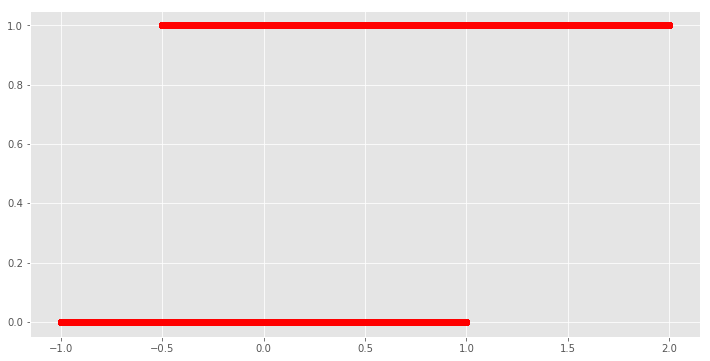

In [6]:
plt.plot(X,y,'ro')
plt.show()

In [7]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

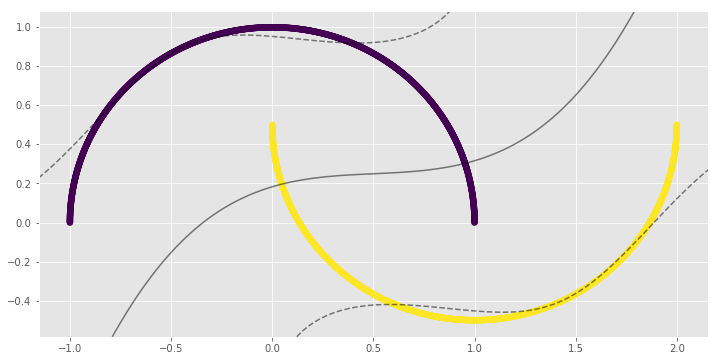

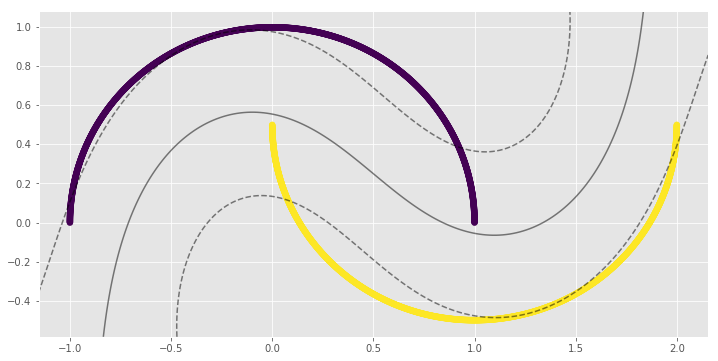

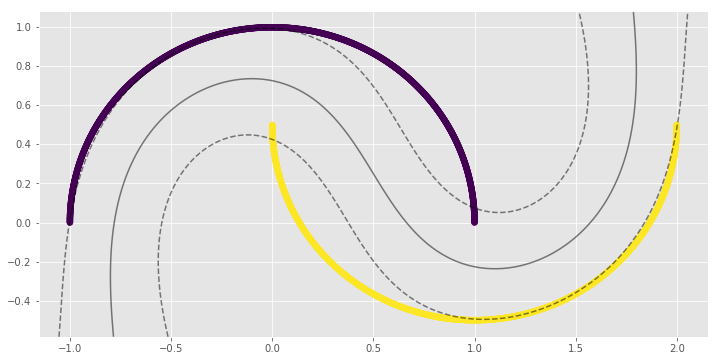

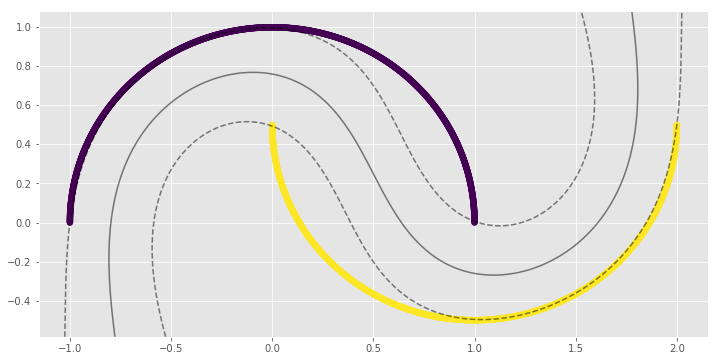

0.9015
1.0
1.0
1.0


In [8]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))